
# MBIT School

## Master Online en Data Science para Profesionales

---

## Módulo 6: Visualización de Datos y Storytelling
## Submódulo S03: Proyecto de consolidación

---

### Proyecto de consolidación

#### Daniel González (daniel.gonzalez@mbitschool.com)

---


A continuación se muestra el dashboard que queremos realizar pero se encuentra incompleto. Usa la guía para crear y completar los elementos que faltan en el dashboard. Los elementos que faltan y que se deben incluir son:

- **KPIs de facebook, instagram y twitter**: las métricas globales de cada red social debe mostrar las visitas totales producidas. Para ellos tendrás que realizar los siguientes pasos:
    - Incluir una visualización con imágen como la de _Total Users_ para facebook, instagram y twitter.
    - Incluir en el callback estas métricas como *Output*.
    - Incluir la creación de las vistas de los datos para cada red social en el callback haciendo un filtrado usando los valores de los controles/filtros (*Inputs*).
    - Ejemplo de resultado de la visualización de Twitter:
    
    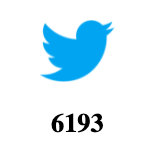
    
- **Gráfico de líneas por red social**: incluir un gráfico de líneas por red social que muestre la evolución de las visitas totales por red social.
    - Utilizar el gráfico `px.line` para crear la visualización. Ejemplo de gráfico: [link](https://plotly.com/python/line-charts/#line-plots-with-column-encoding-color)
    - Incluir en el callback el gráfico como *Output*.
    - Incluir la creación de la vista de los datos en el callback haciendo un filtrado usando los valores de los controles/filtros (*Inputs*).
    - Ejemplo de resultado de la visualización:
    
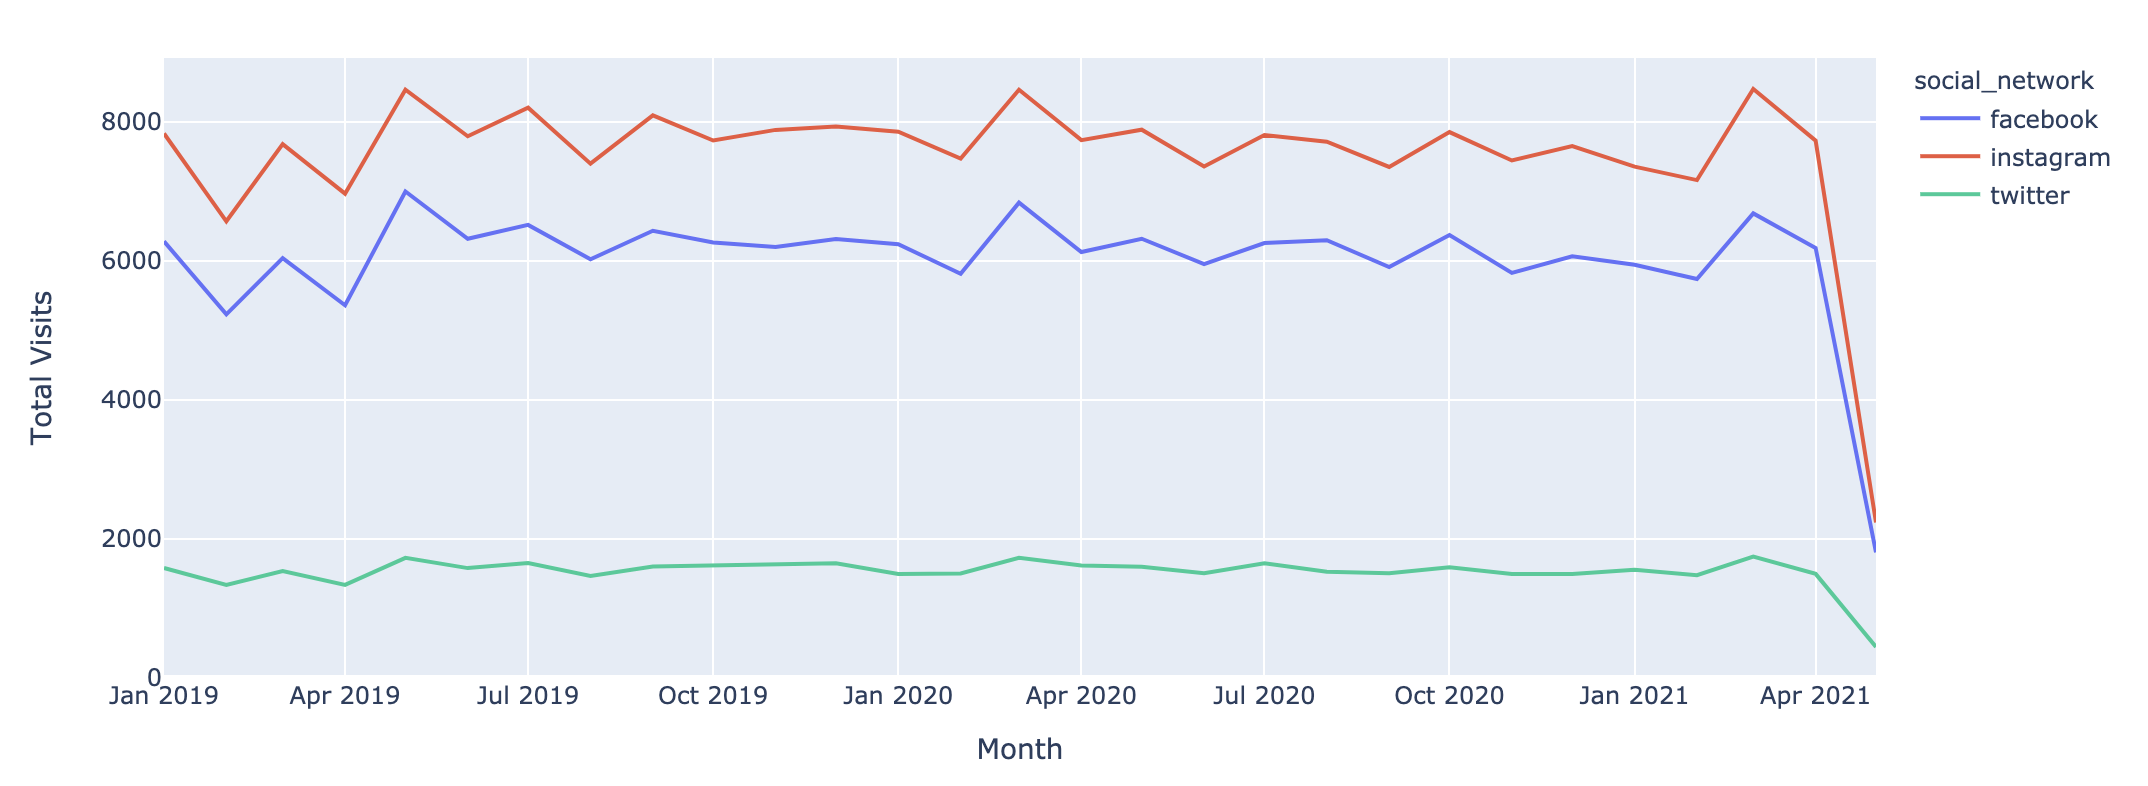


- **Gráfico pie por dispositivo**: incluir un gráfico por dispositivo que muestre las visitas totales por dispositivo.
    - Utilizar el gráfico `px.choropleth` para crear la visualización. Ejemplo de gráfico: [link](https://plotly.com/python/pie-charts/#pie-chart-with-repeated-labels)
    - Incluir en el callback el gráfico como *Output*.
    - Incluir la creación de la vista de los datos en el callback haciendo un filtrado usando los valores de los controles/filtros (*Inputs*).
    - Ejemplo de resultado de la visualización:
    
 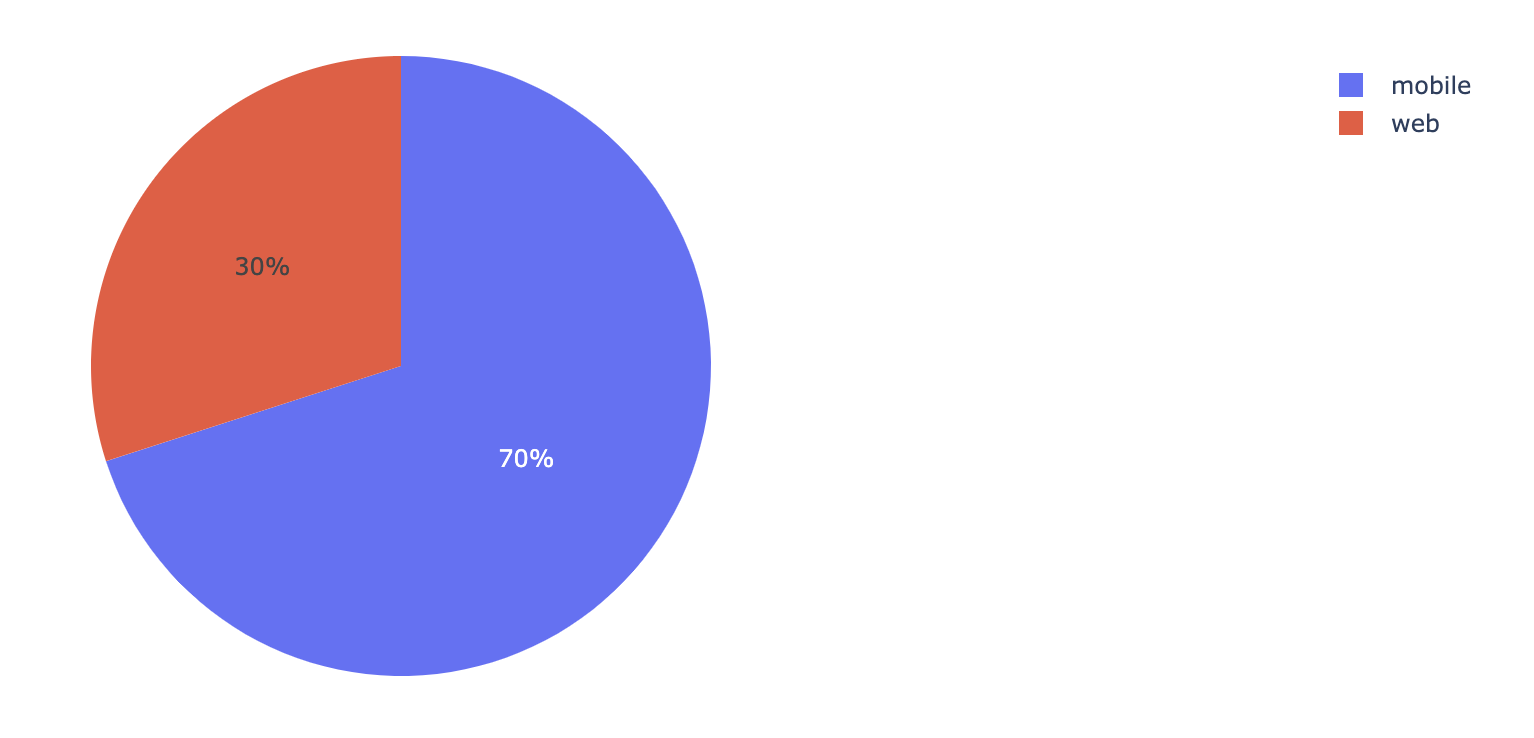

- **Gráfico de paises**: incluir un gráfico por paises que muestre las visitas totales por pais.
    - Utilizar el gráfico `px.choropleth` para crear la visualización. Ejemplo de gráfico: [link](https://plotly.com/python/choropleth-maps/#using-builtin-country-and-state-geometries)
    - Incluir en el callback el gráfico como *Output*.
    - Incluir la creación de la vista de los datos en el callback haciendo un filtrado usando los valores de los controles/filtros (*Inputs*).
    - Ejemplo de resultado de la visualización:
    
    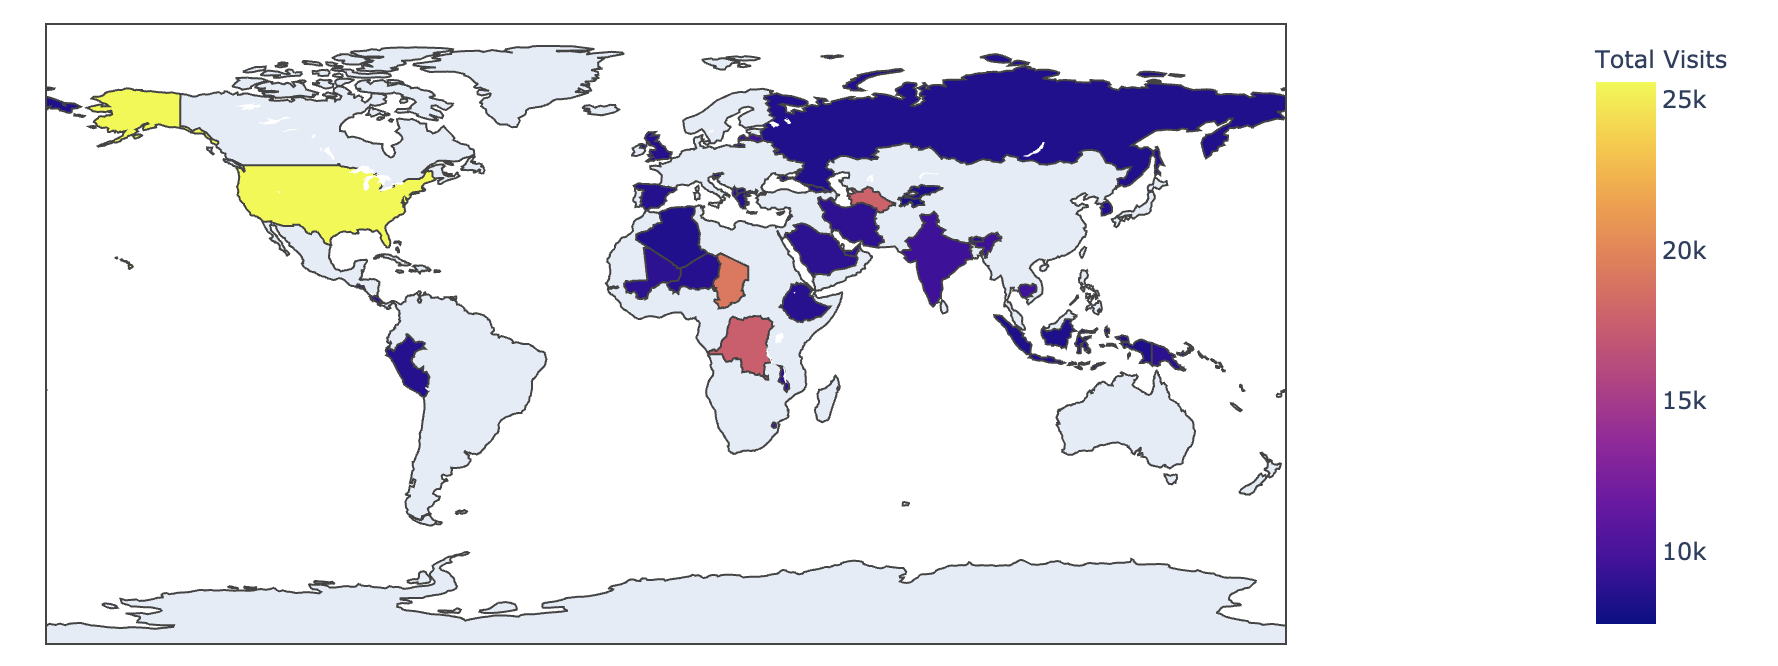

<div style="text-align: center">
<h1><font color="black" size=8>PROYECTO DE CONSOLIDACIÓN</font></h1>

<div style="text-align: left">
<h1><font color="#009D7F" size=5>Alejandro Santiago Bitria</font></h1>

# Dashboard:

In [1]:
from jupyter_dash import JupyterDash
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

import pandas as pd
from datetime import date

app = JupyterDash()


df = pd.read_csv('C:/Users/ALEX/Desktop/Master/Proyectos/Proyecto Visualización/proyecto/data/social_network.csv')


app.layout = html.Div([
    html.H1('Dashboard Social Networks', style={
            "text-align": "center", "margin-top": "24px", "margin-bottom": "48px"}),
    html.Div([
        dcc.DatePickerRange(
            id='date-picker-range',
            start_date=date(2021, 1, 1),
            end_date=date(2021, 4, 30),
        ),
        dcc.Dropdown(
            id="social-networks-dropdown",
            options=[{"label": social_network, "value": social_network}
                     for social_network in df.social_network.unique()],
            value=[social_network for social_network in df.social_network.unique()],
            multi=True
        ),
        dcc.Checklist(
            id='devices-checkbox',
            options=[{"label": device, "value": device}
                     for device in df.device.unique()],
            value=[device for device in df.device.unique()],
            style={'margin-top': '8px'}
        )
    ], style={"columnCount": 3, 'textAlign': "center", "margin-top": "24px", "margin-bottom": "48px"}),
    html.Div([
        html.Div([
            html.Img(src="https://dmedina-mbit.s3.eu-west-1.amazonaws.com/ds-mar21-images/user-icon.png",
                     style={"width": "50px"}),
            html.H2(
                id='total-visit',
            )
        ]),
        html.Div([
            html.Img(src= "https://dmedina-mbit.s3.eu-west-1.amazonaws.com/ds-mar21-images/facebook-logo.png",
                     style={"width": "50px"}),
            html.H2(
                id='facebook-visit',
            )
        ]),

         html.Div([
            html.Img(src= "https://dmedina-mbit.s3.eu-west-1.amazonaws.com/ds-mar21-images/instagram-logo.png",
                     style={"width": "50px"}),
            html.H2(
                id='instagram-visit',
            )
        ]),

        html.Div([
            html.Img(src= " https://dmedina-mbit.s3.eu-west-1.amazonaws.com/ds-mar21-images/twitter-logo.png ",
                     style={"width": "50px"}),
            html.H2(
                id='twitter-visit',
            )
        ])

    ], style={"columnCount": 4, 'textAlign': "center"}),
    html.H3('Total Visits by Month', style={"textAlign": "center"}),
    dcc.Graph(
        id='total-visit-line'
    ),

    html.H3('Total Visits by Social Networks', style={"textAlign": "center"}),
    dcc.Graph(
        id='total-visit-social-networks-line'
    ),

    html.H3('Total Visits by Device', style={"textAlign": "center"}),
    dcc.Graph(
        id='devices-pie'
    ),

    html.H3('Total Visits by Country', style={"textAlign": "center"}),
    dcc.Graph(
        id='country-choropleth'
    )
])


@app.callback(
    Output('total-visit', 'children'),
    Output('facebook-visit', 'children'),
    Output('instagram-visit', 'children'),
    Output('twitter-visit', 'children'),
    Output('total-visit-line', 'figure'),
    Output('total-visit-social-networks-line', 'figure'),
    Output('devices-pie', 'figure'),
    Output('country-choropleth', 'figure'),
    Input('date-picker-range', 'start_date'),
    Input('date-picker-range', 'end_date'),
    Input('social-networks-dropdown', 'value'),
    Input('devices-checkbox', 'value')
) 

def update_figures(start_date_selected, end_date_selected, social_networks_selected, devices_selected):

    total_visit = (
        df
        .loc[(df.social_network.isin(social_networks_selected)) &
             (df.device.isin(devices_selected)) &
             (df.datetime >= start_date_selected) &
             (df.datetime <= end_date_selected)]
    ).shape[0]

    facebook_visit = (
        df
        .loc[(df.social_network == 'facebook') &
             (df.social_network.isin(social_networks_selected)) &
             (df.device.isin(devices_selected)) &
             (df.datetime >= start_date_selected) &
             (df.datetime <= end_date_selected)]
    ).shape[0]

    instagram_visit = (
        df
        .loc[(df.social_network == 'instagram') &
             (df.social_network.isin(social_networks_selected)) &
             (df.device.isin(devices_selected)) &
             (df.datetime >= start_date_selected) &
             (df.datetime <= end_date_selected)]
    ).shape[0]

    twitter_visit = (
        df
        .loc[(df.social_network == 'twitter') &
             (df.social_network.isin(social_networks_selected)) &
             (df.device.isin(devices_selected)) &
             (df.datetime >= start_date_selected) &
             (df.datetime <= end_date_selected)]
    ).shape[0]
    
    df_by_month = (
        df
        .loc[(df.social_network.isin(social_networks_selected)) &
             (df.device.isin(devices_selected)) &
             (df.datetime >= start_date_selected) &
             (df.datetime <= end_date_selected)]
        .groupby(['year', 'month'])
        .count()
        .name
        .reset_index()
        .assign(
            year_month=lambda df: df.year.astype('str')+'-'+ df.month.astype('str')
        )
    )

    df_month_social_network = (
        df
        .loc[(df.social_network.isin(social_networks_selected)) &
             (df.device.isin(devices_selected)) &
             (df.datetime >= start_date_selected) &
             (df.datetime <= end_date_selected)]
        .groupby(['year', 'month', 'social_network'])
        .count()
        .name
        .reset_index()
        .assign(
            year_month=lambda df: df.year.astype('str')+'-'+ df.month.astype('str')
        )
    )

    df_devices = (
        df
        .loc[(df.social_network.isin(social_networks_selected)) &
             (df.device.isin(devices_selected)) &
             (df.datetime >= start_date_selected) &
             (df.datetime <= end_date_selected)]
        .groupby(['device'])
        .count()
        .name
        .reset_index()
    )                    

    df_country = (
        df
        .loc[(df.social_network.isin(social_networks_selected)) &
             (df.device.isin(devices_selected)) &
             (df.datetime >= start_date_selected) &
             (df.datetime <= end_date_selected)]
        .groupby(['country', 'country_code'])
        .count()
        .name
        .reset_index()
    )

    total_visit_fig = px.line(
        df_by_month,
        x="year_month",
        y="name",
        height = 600,
        labels={
            "name": "Total Visits",  "year_month": "Month"
        }
    )

    total_visit_social_network_fig = px.line(
        df_month_social_network,
        x="year_month",
        y="name",
        color = "social_network",
        height = 700,
        labels={
            "name": "Total Visits",  "year_month": "Month"
        }
    )

    devices_pie_fig = px.pie(
        df_devices,
        values = 'name',
        names = "device",
        height = 650,
        labels={
            "name": "Total Visits"
        }
    )

    country_choropleth_fig = px.choropleth(
        df_country,
        locations = "country_code",
        color = "name",
        hover_name = "country",
        color_continuous_scale = "greens",
        height = 500,
        labels={
            "name": "Total Visits"
        }
    )
    
    return total_visit, facebook_visit, instagram_visit, twitter_visit, total_visit_fig, total_visit_social_network_fig, devices_pie_fig, country_choropleth_fig

app.run_server(mode='inline', port='8000')